In [2]:
import pandas as pd #importing neccesary libraries which I will be using throughout this analysis.
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [3]:
df=pd.read_csv("cms_Hbb.csv") #importing file I will be using.

In [4]:
df.info() #information of the data set, to understand how many entries and how many feautures it has.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225868 entries, 0 to 225867
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  225868 non-null  int64  
 1   jetNTracks                  225868 non-null  float64
 2   nSV                         225868 non-null  float64
 3   tau0_trackEtaRel_0          225868 non-null  float64
 4   tau0_trackEtaRel_1          225868 non-null  float64
 5   tau0_trackEtaRel_2          225868 non-null  float64
 6   tau1_trackEtaRel_0          225868 non-null  float64
 7   tau1_trackEtaRel_1          225868 non-null  float64
 8   tau1_trackEtaRel_2          225868 non-null  float64
 9   tau_flightDistance2dSig_0   225868 non-null  float64
 10  tau_flightDistance2dSig_1   225868 non-null  float64
 11  tau_vertexDeltaR_0          225868 non-null  float64
 12  tau_vertexEnergyRatio_0     225868 non-null  float64
 13  tau_vertexEner

In [5]:
print(df.describe().T) #printed main statistics of the data to learn more about it.

                               count          mean           std        min  \
Unnamed: 0                  225868.0  93832.915521  54160.982041   0.000000   
jetNTracks                  225868.0     18.231325      6.608610   3.000000   
nSV                         225868.0      2.947412      1.060900   0.000000   
tau0_trackEtaRel_0          225868.0      2.569788      0.845000   0.284457   
tau0_trackEtaRel_1          225868.0      3.097384      0.981618   0.310886   
tau0_trackEtaRel_2          225868.0      3.672895      1.217992   0.571661   
tau1_trackEtaRel_0          225868.0      2.499595      0.871929   0.065587   
tau1_trackEtaRel_1          225868.0      2.993946      1.028779   0.185446   
tau1_trackEtaRel_2          225868.0      3.509967      1.248436   0.332880   
tau_flightDistance2dSig_0   225868.0     13.639056     23.197000   2.000028   
tau_flightDistance2dSig_1   225868.0     13.014575     23.947717   2.000020   
tau_vertexDeltaR_0          225868.0      0.112823  

In [6]:
print(df.isna().sum()) #summed all possible missing values, but realised there were none.

Unnamed: 0                    0
jetNTracks                    0
nSV                           0
tau0_trackEtaRel_0            0
tau0_trackEtaRel_1            0
tau0_trackEtaRel_2            0
tau1_trackEtaRel_0            0
tau1_trackEtaRel_1            0
tau1_trackEtaRel_2            0
tau_flightDistance2dSig_0     0
tau_flightDistance2dSig_1     0
tau_vertexDeltaR_0            0
tau_vertexEnergyRatio_0       0
tau_vertexEnergyRatio_1       0
tau_vertexMass_0              0
tau_vertexMass_1              0
trackSip2dSigAboveBottom_0    0
trackSip2dSigAboveBottom_1    0
trackSip2dSigAboveCharm_0     0
trackSipdSig_0                0
trackSipdSig_0_0              0
trackSipdSig_0_1              0
trackSipdSig_1                0
trackSipdSig_1_0              0
trackSipdSig_1_1              0
trackSipdSig_2                0
trackSipdSig_3                0
isBackground                  0
isSignal                      0
dtype: int64


In [7]:
df_clean=df.dropna() #dropping NaN values, if any are present.

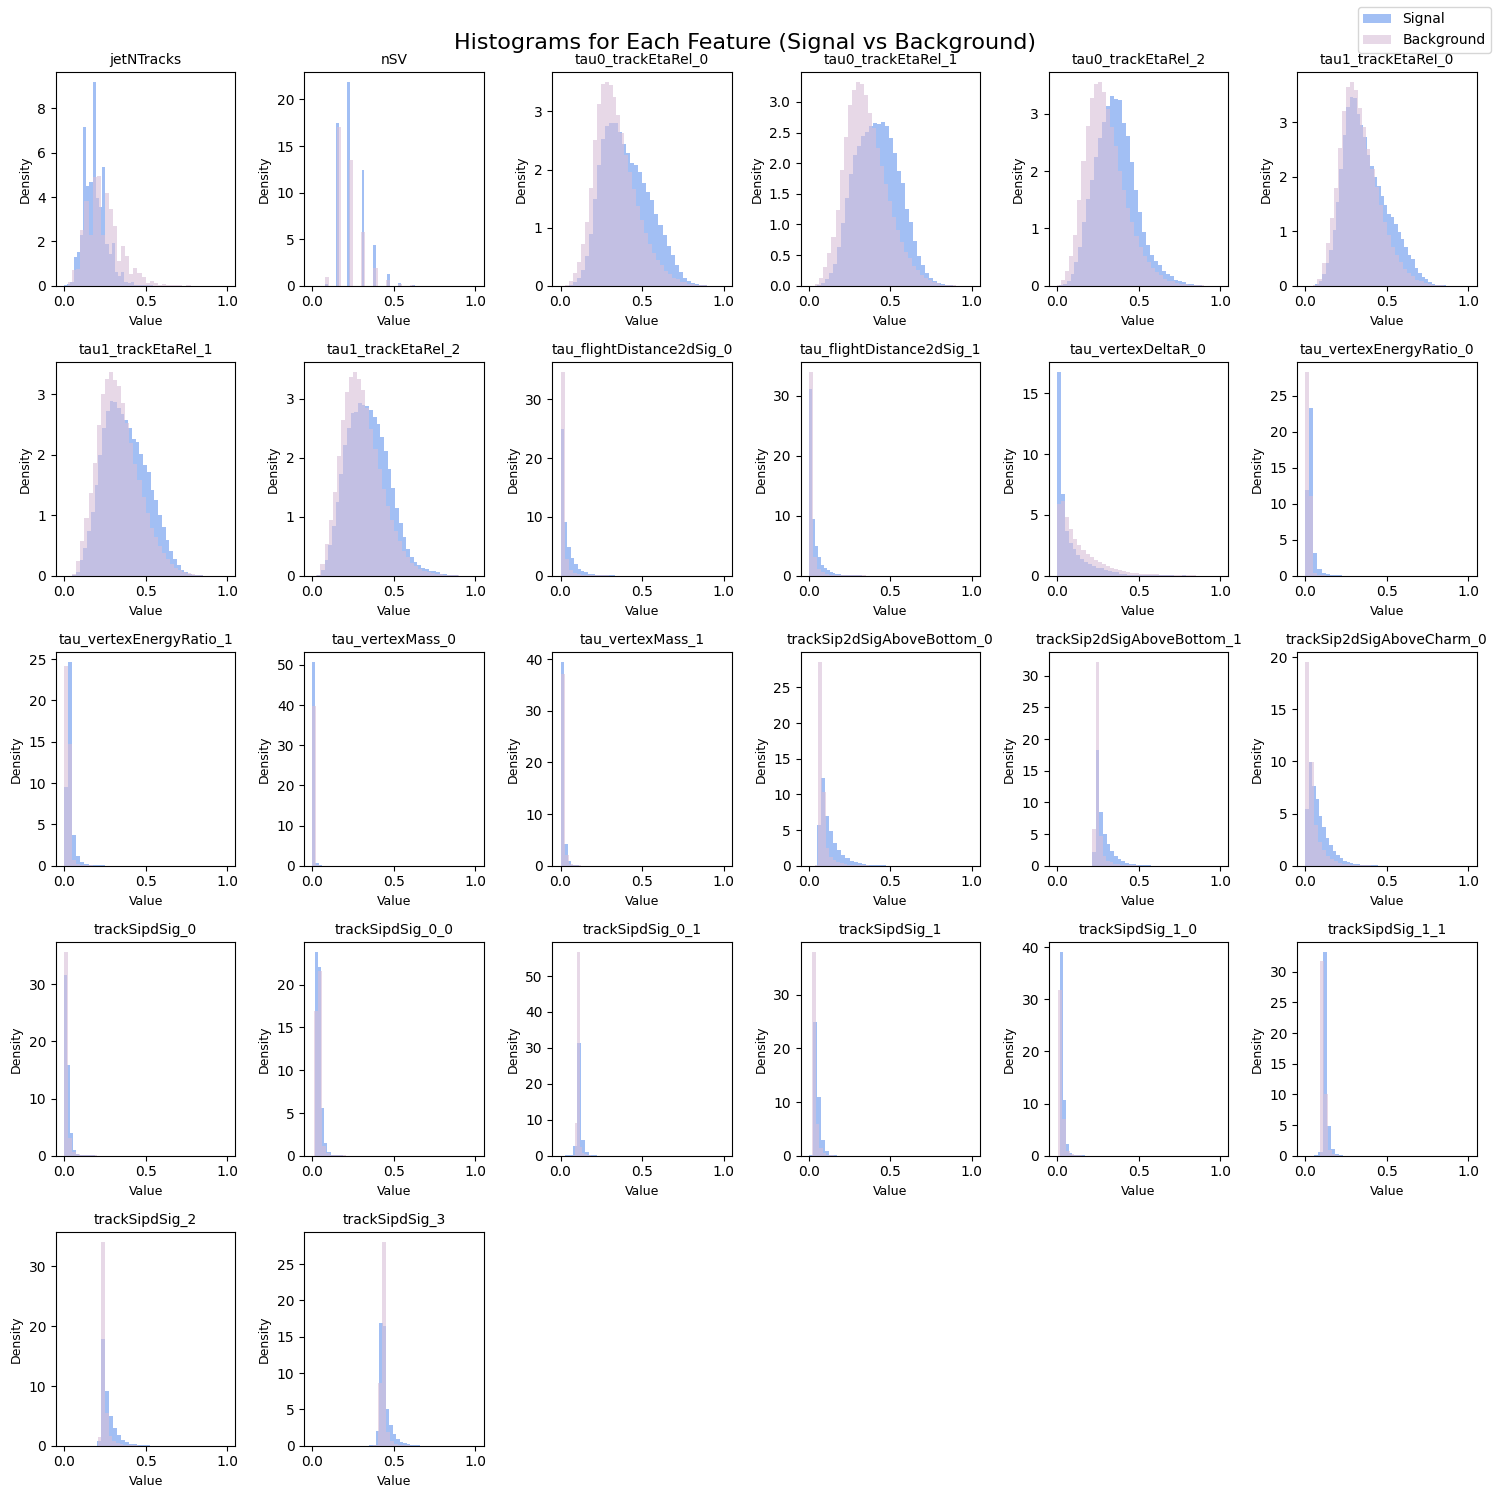

In [8]:
#histograms
df.columns=df.columns.str.strip() #cleaning column names, to remove unessecary white-spaces.

features=["jetNTracks","nSV","tau0_trackEtaRel_0","tau0_trackEtaRel_1","tau0_trackEtaRel_2",
          "tau1_trackEtaRel_0","tau1_trackEtaRel_1","tau1_trackEtaRel_2","tau_flightDistance2dSig_0",
          "tau_flightDistance2dSig_1", "tau_vertexDeltaR_0", "tau_vertexEnergyRatio_0",
          "tau_vertexEnergyRatio_1","tau_vertexMass_0","tau_vertexMass_1",
          "trackSip2dSigAboveBottom_0","trackSip2dSigAboveBottom_1","trackSip2dSigAboveCharm_0",
            "trackSipdSig_0","trackSipdSig_0_0","trackSipdSig_0_1","trackSipdSig_1","trackSipdSig_1_0",
          "trackSipdSig_1_1","trackSipdSig_2","trackSipdSig_3"] #defining my feautures.
labels=["isBackground","isSignal"]
df_nolabels=df_clean.drop(labels, axis=1)
df_nounamed=df_nolabels.drop("Unnamed: 0", axis=1)

scaler=MinMaxScaler()
df_clean[features]=scaler.fit_transform(df_clean[features]) #normalising features.
background_df=df_clean[df_clean["isBackground"]==1] #assigning the feautures to background count.
signal_df=df_clean[df_clean["isSignal"]==1] #assigning the feautures to signal count.

col=6
rows=int(np.ceil(len(features)/col))
fig,axes=plt.subplots(rows,col,figsize=(15, 15))
axes=axes.flatten() #making shape for the histogram layout.
idx=0
for feature in features:
    ax=axes[idx]

    signal=signal_df[feature] #assigning feautures which are signals.
    background=background_df[feature] #assigning feautures which are background.

    ax.hist(signal,bins=40,alpha=0.6,color="cornflowerblue",label="Signal",density=True) #plotting histograms for feautures which are signals.
    ax.hist(background,bins=40, alpha=0.6,color="thistle",label="Background",density=True) #plotting histograms for feautures which are background.
    ax.set_title(feature,fontsize=10)
    ax.set_xlabel("Value",fontsize=9)
    ax.set_ylabel("Density",fontsize=9)

    idx+=1
for j in range(idx, len(axes)):
    fig.delaxes(axes[j])
plt.suptitle("Histograms for Each Feature (Signal vs Background)", fontsize=16) #comparison plot for signal and background.
fig.tight_layout()
fig.legend(["Signal","Background"])
plt.show()


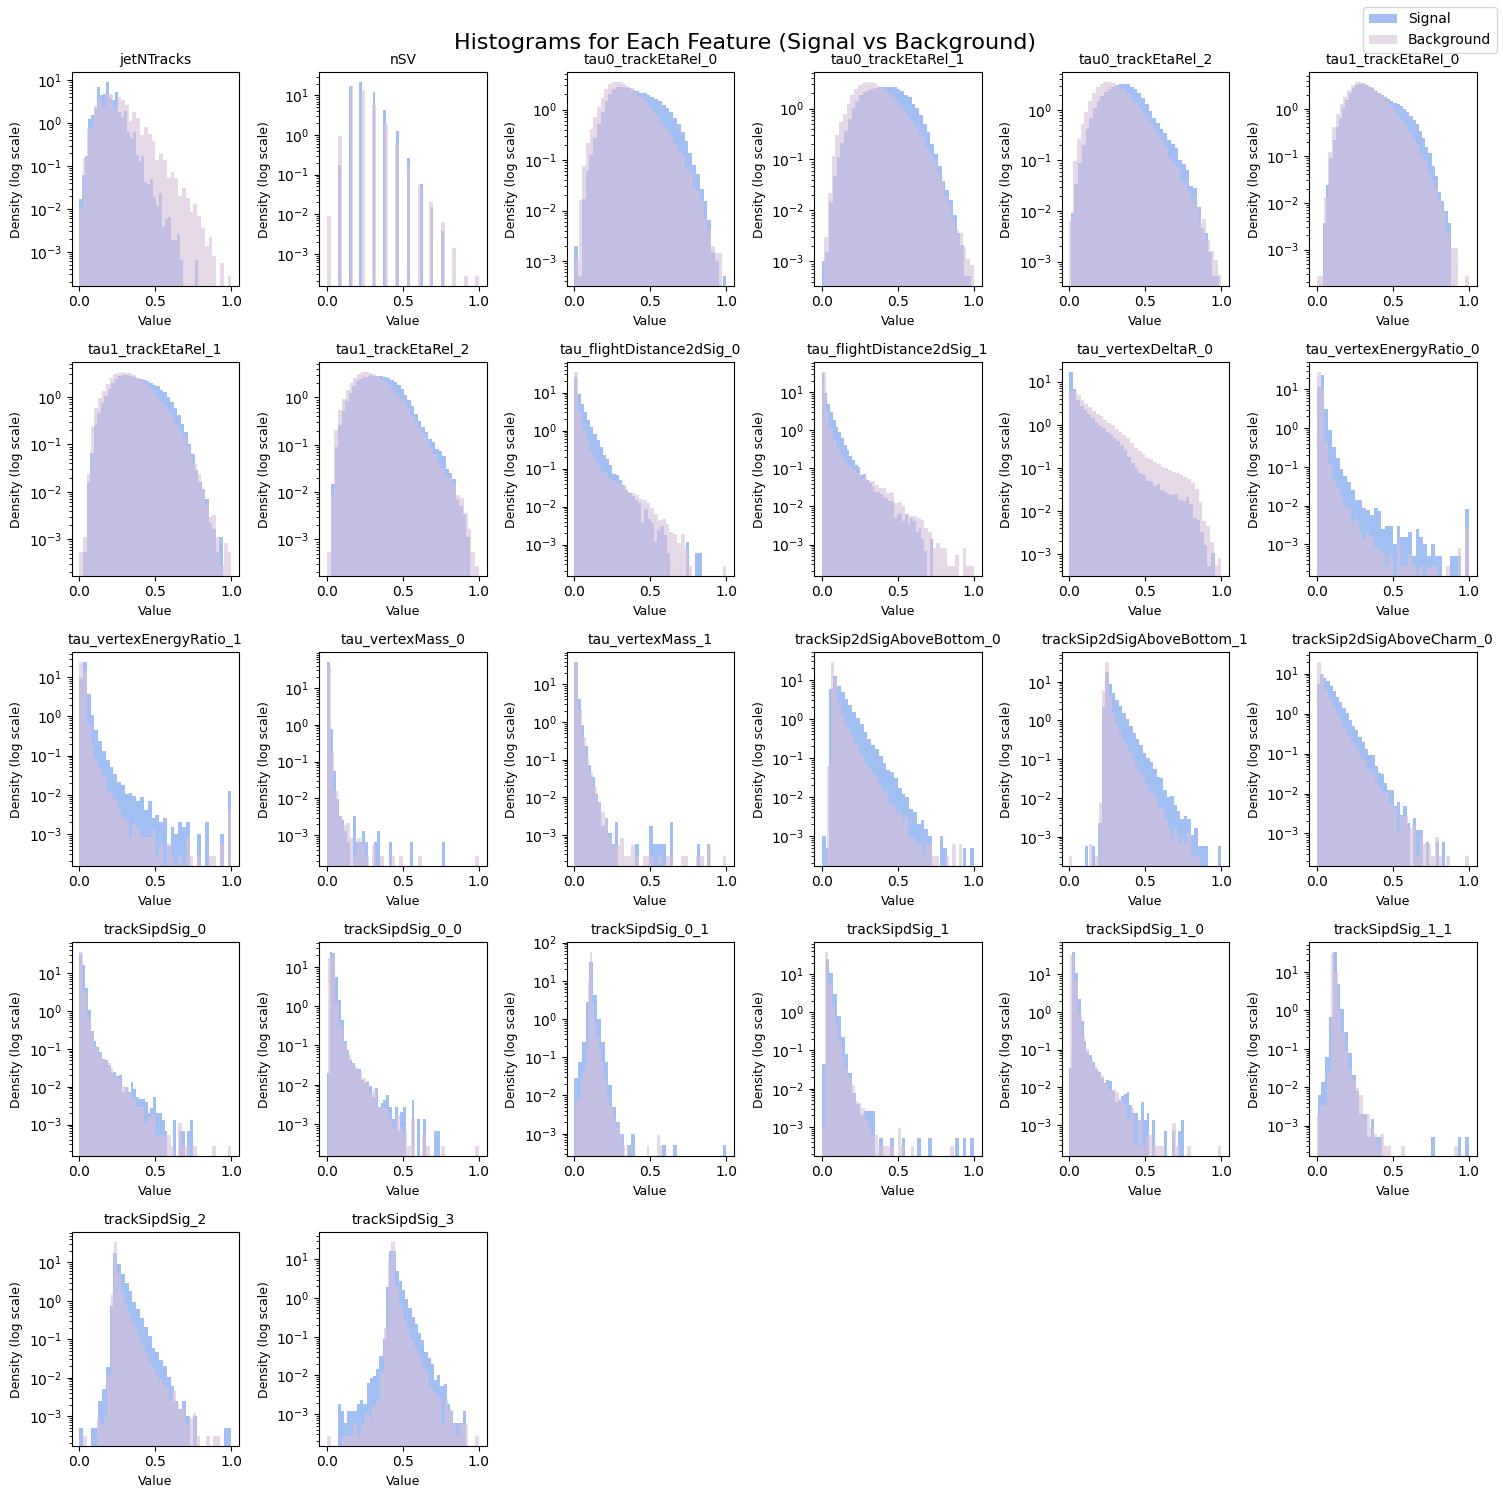

In [9]:
col=6
rows=int(np.ceil(len(features)/col)) #log comparison plot
fig,axes=plt.subplots(rows,col,figsize=(15, 15))
axes=axes.flatten()
idx=0
for feature in features:
  ax=axes[idx]

  signal=signal_df[feature]
  background=background_df[feature]

  ax.hist(signal,bins=40,alpha=0.6,color="cornflowerblue",label="Signal",density=True)
  ax.hist(background,bins=40, alpha=0.6,color="thistle",label="Background",density=True)
  ax.set_title(feature,fontsize=10)
  ax.set_xlabel("Value", fontsize=9)
  ax.set_ylabel("Density (log scale)", fontsize=9)
  ax.set_yscale("log")

  idx+=1
for j in range(idx, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Histograms for Each Feature (Signal vs Background)", fontsize=16)
fig.tight_layout()
fig.legend(["Signal","Background"])
plt.show()

the binning that was used was of 40. I wanted to keep the number of bins consistent with each to analyse their distribuitions fairly. The advantages of computing histograms in a linear scale is that it showcases the real distribuition of the data, but a disadvantage of it is that because it is the true distruibuition, many feautures with low frequencies won't show a proper distribuition from where information can be xtracted from. The log-scaled histograms, allows you to do visualize these low frequencies areas, which makes it more useful for analysis, but can be harder to interpret since most features distribuitions are distorted.

                       Feature       Mean        Std
0                   jetNTracks  18.231325   6.608610
1                          nSV   2.947412   1.060900
2           tau0_trackEtaRel_0   2.569788   0.845000
3           tau0_trackEtaRel_1   3.097384   0.981618
4           tau0_trackEtaRel_2   3.672895   1.217992
5           tau1_trackEtaRel_0   2.499595   0.871929
6           tau1_trackEtaRel_1   2.993946   1.028779
7           tau1_trackEtaRel_2   3.509967   1.248436
8    tau_flightDistance2dSig_0  13.639056  23.197000
9    tau_flightDistance2dSig_1  13.014575  23.947717
10          tau_vertexDeltaR_0   0.112823   0.124914
11     tau_vertexEnergyRatio_0   0.484118   1.159889
12     tau_vertexEnergyRatio_1   0.587807   1.326947
13            tau_vertexMass_0   4.030210   5.707829
14            tau_vertexMass_1   5.272924   6.762366
15  trackSip2dSigAboveBottom_0   4.501082   5.643372
16  trackSip2dSigAboveBottom_1   3.039169   3.628405
17   trackSip2dSigAboveCharm_0   6.983188   7.

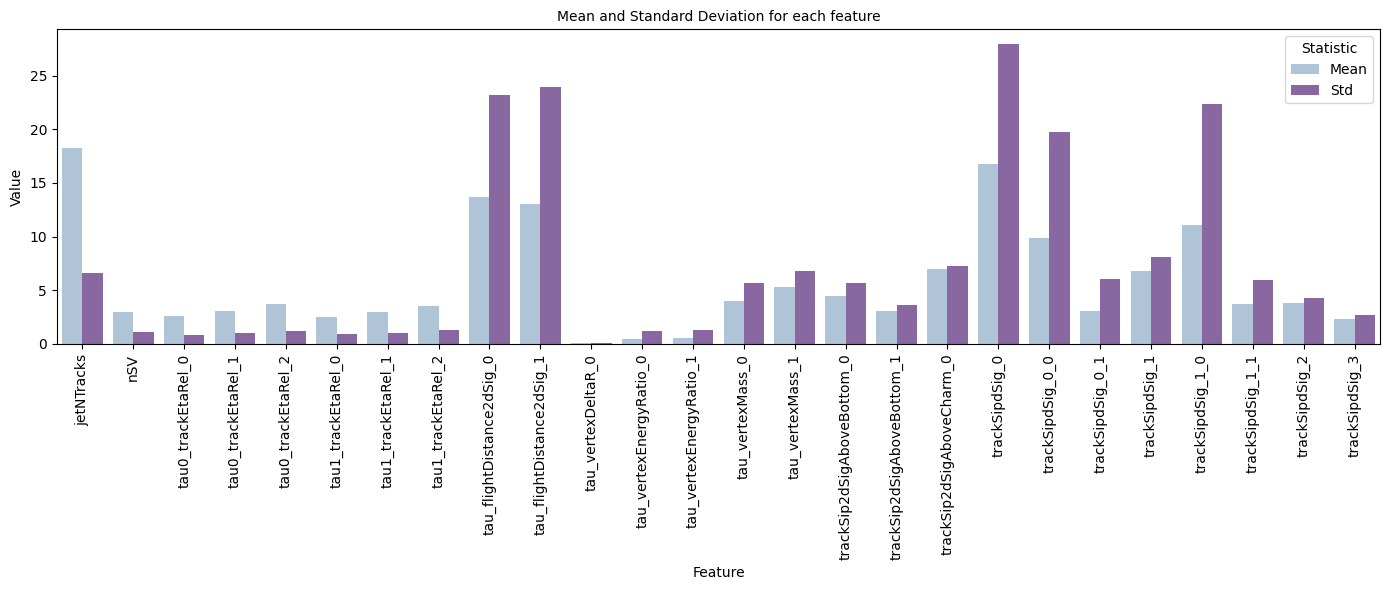

In [10]:
#box plots
df_clean[features] = scaler.inverse_transform(df_clean[features]) #unormalising features.
labels=["isBackground","isSignal"] #removing labels.
df_nolabels=df_clean.drop(labels, axis=1)
df_nounamed=df_nolabels.drop("Unnamed: 0", axis=1)

summary=df_nounamed.describe() #printing main statistics.
main_statistics=summary.loc[["mean","std"]].transpose().reset_index() #exctracting the mean and the standard deviation from the summary and printing them out vertically.
main_statistics.columns=["Feature","Mean","Std"]
print(main_statistics)

main_statistics_melted=main_statistics.melt(id_vars="Feature",var_name="Statistic",value_name="Value") #combing the feautures, so they can be plotted.

plt.figure(figsize=(14, 6))
sns.barplot(data=main_statistics_melted,x="Feature",y="Value",hue="Statistic",palette="BuPu")
plt.xticks(rotation=90)
plt.title("Mean and Standard Deviation for each feature",fontsize=10)
plt.tight_layout()
plt.show()

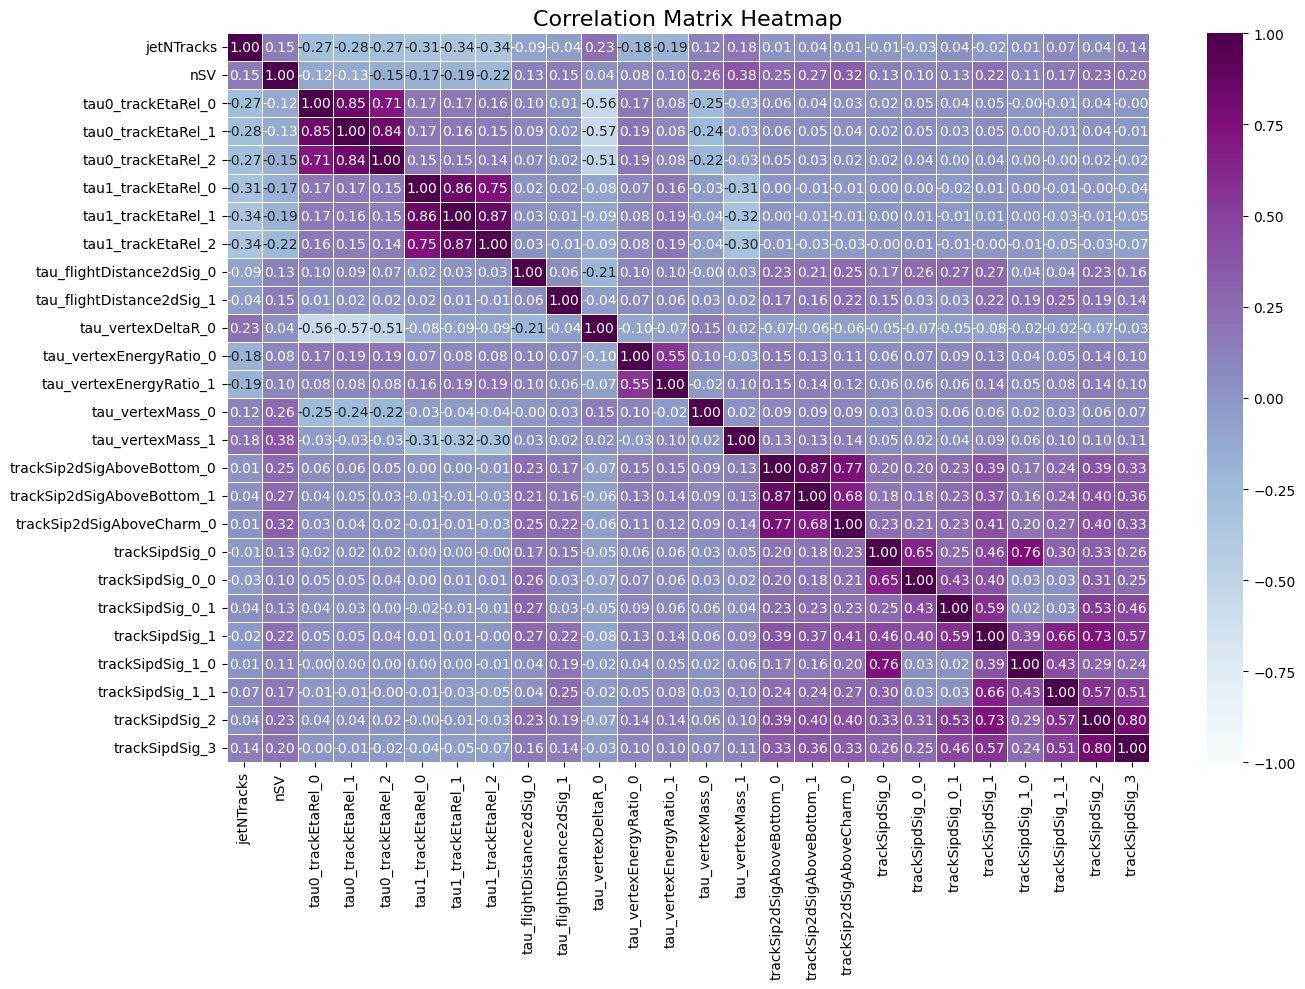

In [11]:
#heatmap
corr_matrix=df_nounamed.corr() #calculating pearson coefficient.

plt.figure(figsize=(14,10)) #creating a heatmap to visualize correlation between features.
sns.heatmap(corr_matrix,annot=True,fmt='.2f',vmin=-1,vmax=1,cmap='BuPu',linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

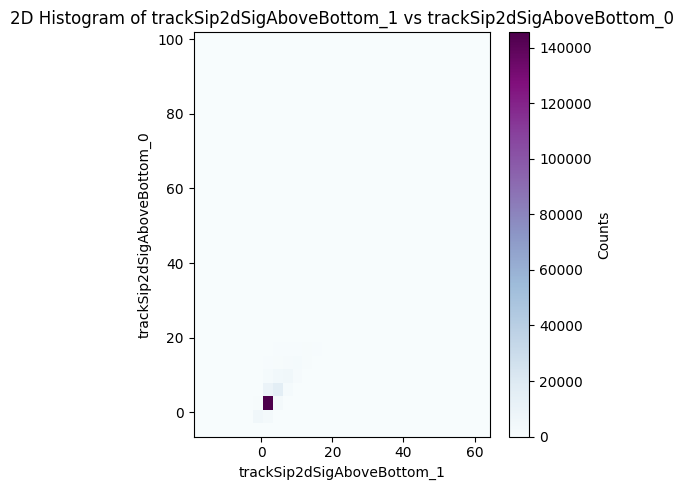

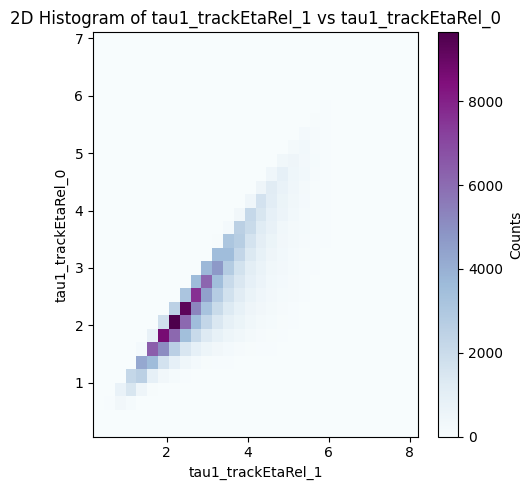

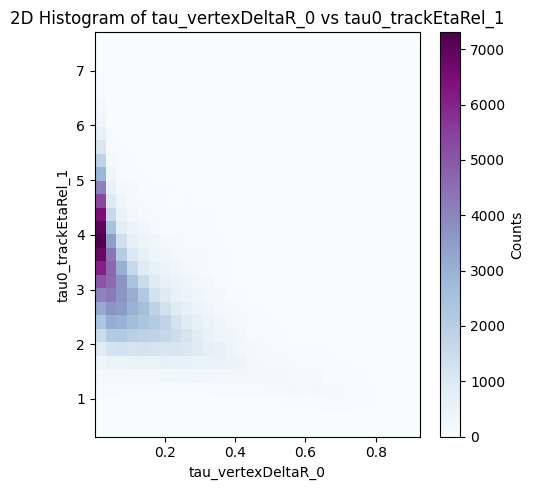

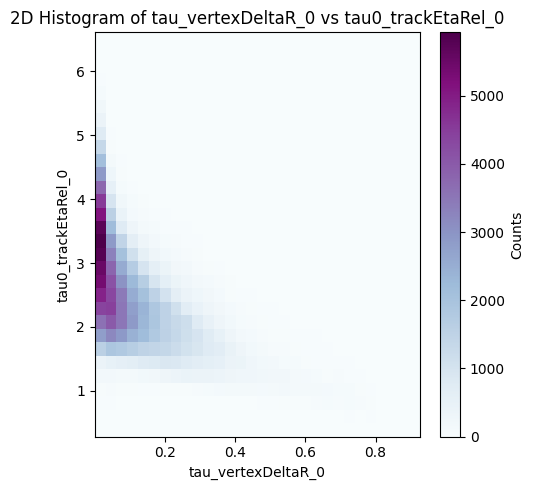

In [12]:
#creating 2D-histograms for the following:
#two-most positively correlated:

#trackSip2dSigAboveBottom_1 and trackSip2dSigAboveBottom_0 : 0.87
plt.figure(figsize=(5,5))
plt.hist2d(df_clean["trackSip2dSigAboveBottom_1"],df_clean["trackSip2dSigAboveBottom_0"],bins=30,cmap="BuPu")
plt.colorbar(label='Counts')
plt.xlabel("trackSip2dSigAboveBottom_1")
plt.ylabel("trackSip2dSigAboveBottom_0")
plt.title("2D Histogram of trackSip2dSigAboveBottom_1 vs trackSip2dSigAboveBottom_0")
plt.tight_layout()
plt.show()

#tau1_trackEtaRel_1 and tau1_trackEtaRel_0 : 0.86
plt.figure(figsize=(5,5))
plt.hist2d(df_clean["tau1_trackEtaRel_1"],df_clean["tau1_trackEtaRel_0"],bins=30,cmap="BuPu")
plt.colorbar(label='Counts')
plt.xlabel("tau1_trackEtaRel_1")
plt.ylabel("tau1_trackEtaRel_0")
plt.title("2D Histogram of tau1_trackEtaRel_1 vs tau1_trackEtaRel_0")
plt.tight_layout()
plt.show()


#two-most negatively correlated:

#tau_vertexDeltaR_0 and tau0_trackEtaRel_1 : -0.56
plt.figure(figsize=(5,5))
plt.hist2d(df_clean["tau_vertexDeltaR_0"],df_clean["tau0_trackEtaRel_1"],bins=30,cmap='BuPu')
plt.colorbar(label="Counts")
plt.xlabel("tau_vertexDeltaR_0")
plt.ylabel("tau0_trackEtaRel_1")
plt.title("2D Histogram of tau_vertexDeltaR_0 vs tau0_trackEtaRel_1")
plt.tight_layout()
plt.show()

#tau_vertexDeltaR_0 and tau0_trackEtaRel_0 : -0.55
plt.figure(figsize=(5,5))
plt.hist2d(df_clean["tau_vertexDeltaR_0"],df_clean["tau0_trackEtaRel_0"],bins=30,cmap="BuPu")
plt.colorbar(label="Counts")
plt.xlabel("tau_vertexDeltaR_0")
plt.ylabel("tau0_trackEtaRel_0")
plt.title("2D Histogram of tau_vertexDeltaR_0 vs tau0_trackEtaRel_0")
plt.tight_layout()
plt.show()

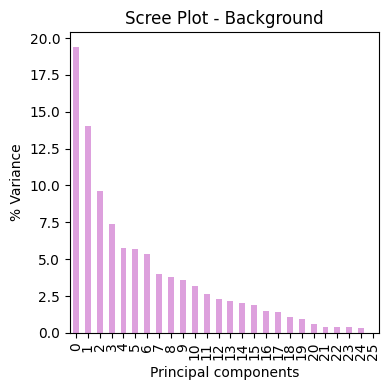

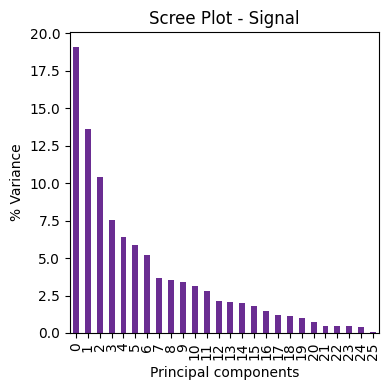

In [13]:
background_df=df_clean[df_clean["isBackground"]==1]
signal_df=df_clean[df_clean["isSignal"]==1] #assigning each label to a variable

sc=StandardScaler() #assigning StandardScaler to a variable.
X_b=sc.fit_transform(background_df[features])
X_s=sc.fit_transform(signal_df[features])

#performing principal component analysis
pca_b=PCA(n_components=len(features))
pca_b.fit(X_b)
loadings_b=pd.DataFrame(pca_b.components_,columns=features)
explained_variance_b=pd.DataFrame(pca_b.explained_variance_ratio_*100)

ax_b=explained_variance_b.head(len(features)).plot.bar(legend=False,color="plum",figsize=(4,4)) #plotting scree plot for background
ax_b.set_xlabel('Principal components')
ax_b.set_ylabel('% Variance')
ax_b.set_title("Scree Plot - Background")
plt.tight_layout()
plt.show()

pca_s=PCA(n_components=len(features))
pca_s.fit(X_s)
loadings_s=pd.DataFrame(pca_s.components_,columns=features)
explained_variance_s=pd.DataFrame(pca_s.explained_variance_ratio_*100)

ax_s=explained_variance_s.head(len(features)).plot.bar(legend=False,color="#6A2D92",figsize=(4, 4))  #plotting scree plot for signal
ax_s.set_xlabel('Principal components')
ax_s.set_ylabel('% Variance')
ax_s.set_title("Scree Plot - Signal")
plt.tight_layout()
plt.show()



In [14]:
loadings_b=pd.DataFrame(pca_b.components_[0:5, :],
                        columns=features) #plotting weights for background events
print(loadings_b)

   jetNTracks       nSV  tau0_trackEtaRel_0  tau0_trackEtaRel_1  \
0    0.152116  0.214449           -0.094722           -0.099352   
1   -0.227996 -0.064106            0.373706            0.382627   
2   -0.088763 -0.074293           -0.311746           -0.343147   
3    0.016116  0.191821            0.001274           -0.007775   
4   -0.023026 -0.007329           -0.032358           -0.040769   

   tau0_trackEtaRel_2  tau1_trackEtaRel_0  tau1_trackEtaRel_1  \
0           -0.100118           -0.134883           -0.145480   
1            0.357436            0.292736            0.298440   
2           -0.326111            0.382633            0.409577   
3           -0.014838            0.134110            0.134543   
4           -0.047978           -0.021573           -0.012292   

   tau1_trackEtaRel_2  tau_flightDistance2dSig_0  tau_flightDistance2dSig_1  \
0           -0.147609                   0.116684                   0.121706   
1            0.282105                   0.075506

In [15]:
loadings_s=pd.DataFrame(pca_s.components_[0:5, :],
                        columns=features) #plotting weights for signal events
print(loadings_s)

   jetNTracks       nSV  tau0_trackEtaRel_0  tau0_trackEtaRel_1  \
0    0.145350  0.195666           -0.121203           -0.128211   
1   -0.190811 -0.189208            0.350407            0.361960   
2   -0.084505 -0.041038           -0.314972           -0.324094   
3   -0.082628  0.129748            0.012359            0.017676   
4   -0.017045 -0.025510           -0.044157           -0.074325   

   tau0_trackEtaRel_2  tau1_trackEtaRel_0  tau1_trackEtaRel_1  \
0           -0.125072           -0.126523           -0.135044   
1            0.333733            0.259007            0.278943   
2           -0.292955            0.410320            0.428907   
3            0.017654           -0.001588            0.006677   
4           -0.101272           -0.049790           -0.024081   

   tau1_trackEtaRel_2  tau_flightDistance2dSig_0  tau_flightDistance2dSig_1  \
0           -0.138959                   0.103151                   0.101782   
1            0.269089                   0.160382

<ipython-input-16-2a3d7006ce4b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['abs_max']=combined.abs().max(axis=1)
<ipython-input-16-2a3d7006ce4b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['abs_max']=combined.abs().max(axis=1)
<ipython-input-16-2a3d7006ce4b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

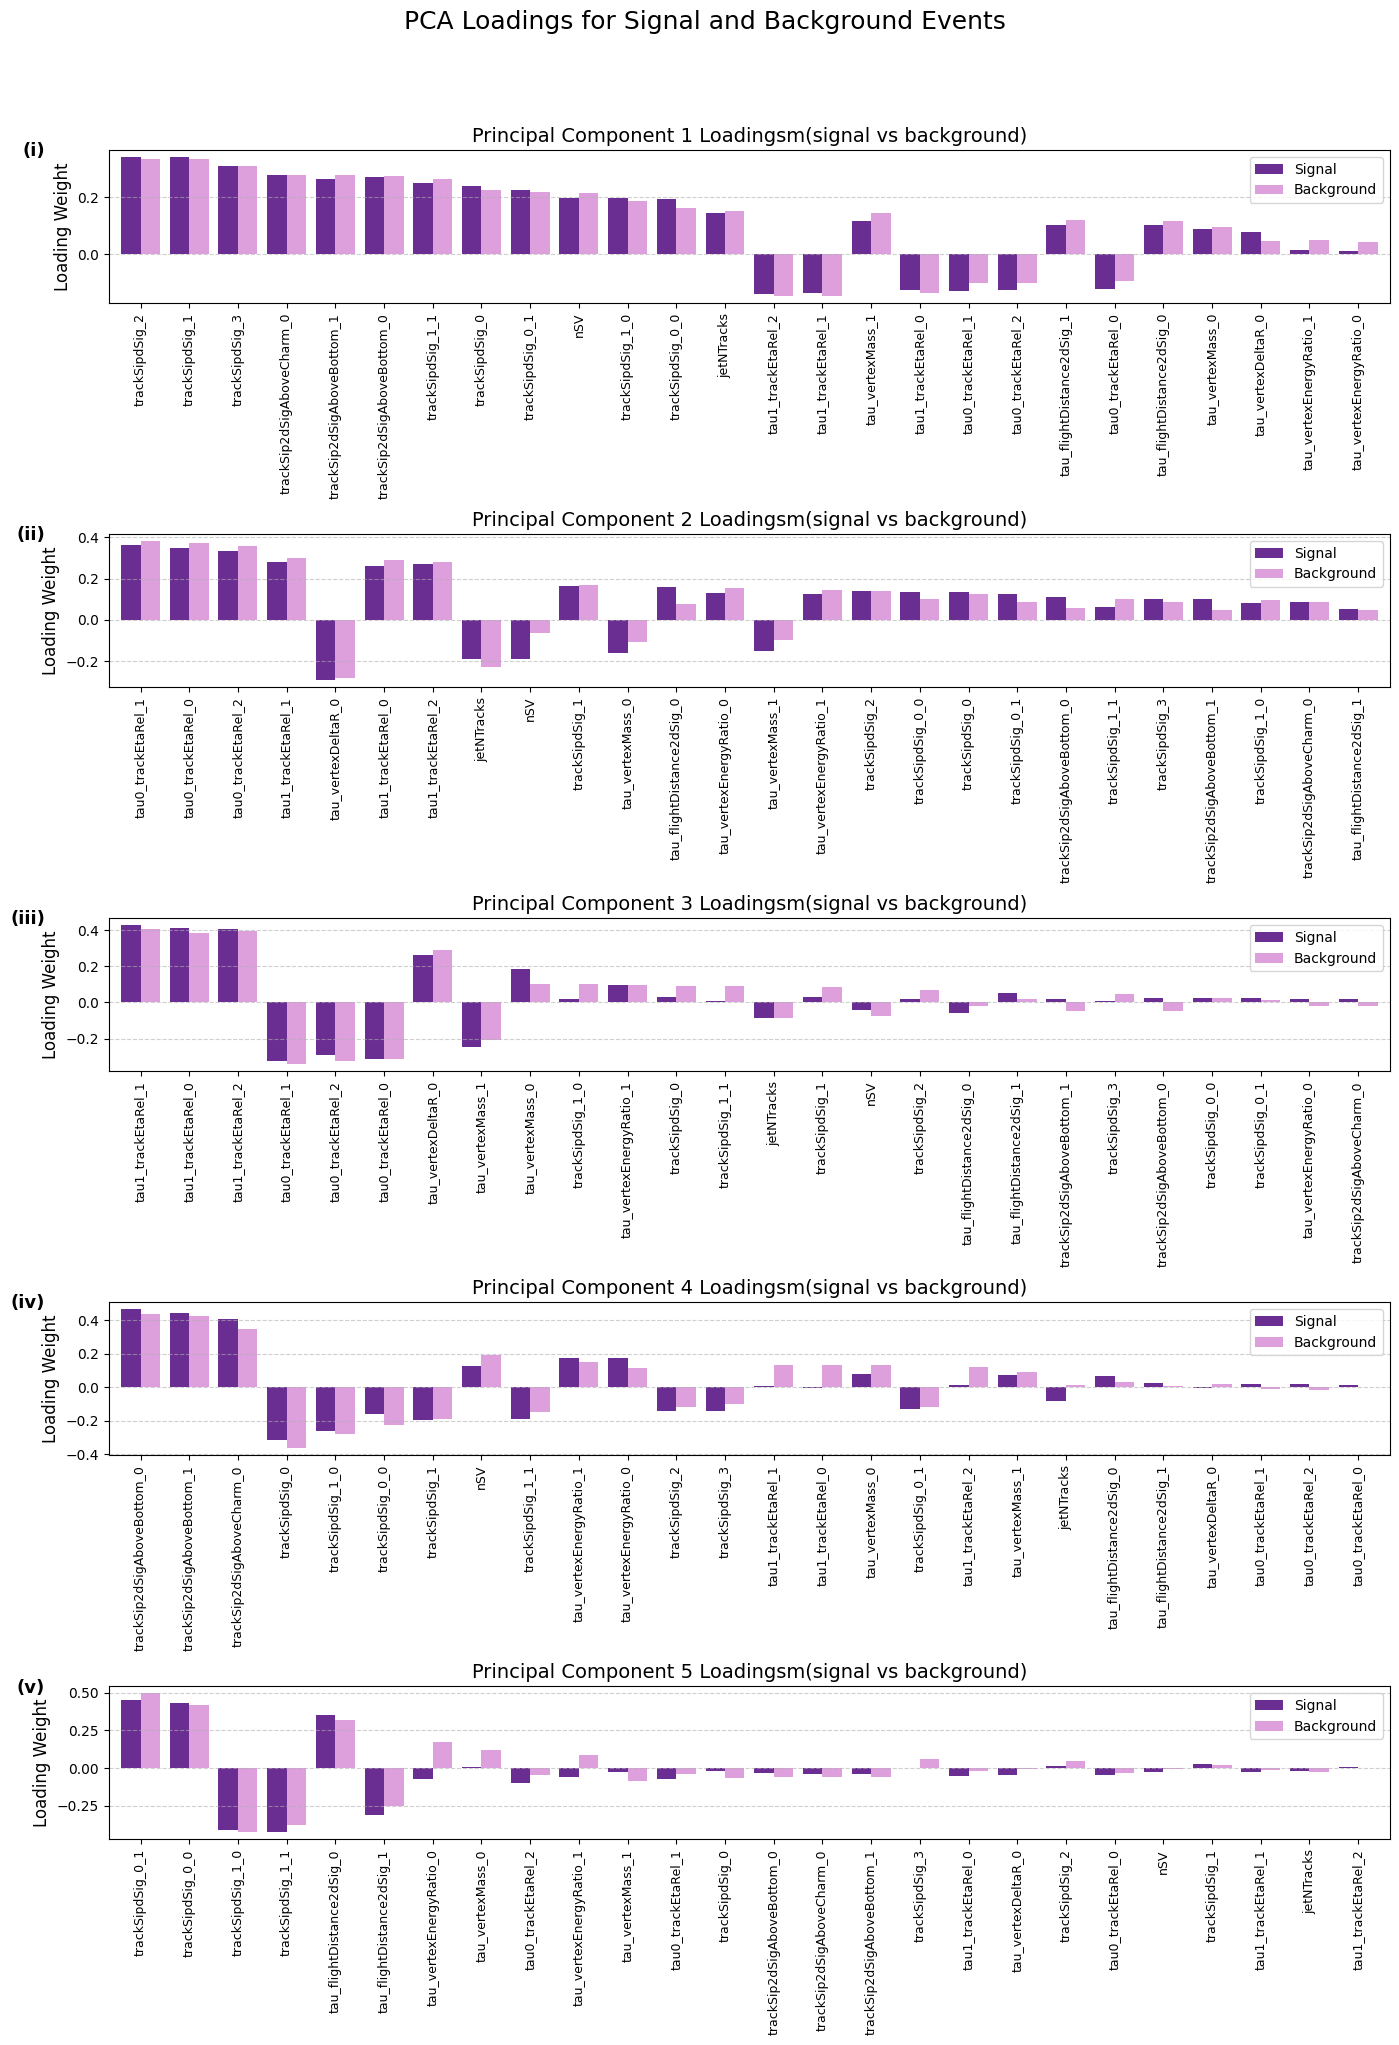

In [16]:
roman_labels=["i","ii","iii","iv","v"] #indexing each graph, to reference later.

n_components=5  #the PCA's which got selected.
loadings_df=pd.DataFrame(index=features)


for i in range(n_components):
    loadings_df[f"PC{i+1}_Signal"]=pca_s.components_[i]
    loadings_df[f"PC{i+1}_Background"]=pca_b.components_[i] #making a template for the PCA's.
fig,axes=plt.subplots(n_components,1,figsize=(14,4*n_components),sharex=False)

for i in range(n_components):
    pc_signal=f"PC{i+1}_Signal"
    pc_background=f"PC{i+1}_Background"

    combined=loadings_df[[pc_signal,pc_background]]
    combined['abs_max']=combined.abs().max(axis=1)
    sorted_combined=combined.sort_values(by='abs_max',ascending=False).drop(columns='abs_max')

    sorted_combined.plot(
        kind='bar',
        ax=axes[i],
        color=["#6A2D92", "plum"],
        width=0.8
    )

    axes[i].set_title(f"Principal Component {i+1} Loadingsm(signal vs background)",fontsize=14)
    axes[i].set_ylabel("Loading Weight", fontsize=12)
    axes[i].legend(["Signal", "Background"], fontsize=10, loc="upper right")
    axes[i].tick_params(axis='x',labelrotation=90,labelsize=9)
    axes[i].grid(axis='y',linestyle='--',alpha=0.6)

    axes[i].text(
        -0.05, 1.05, f"({roman_labels[i]})",
        transform=axes[i].transAxes,
        fontsize=13,
        fontweight='bold',
        va='top',
        ha='right'
    )

fig.suptitle("PCA Loadings for Signal and Background Events", fontsize=18, y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()




(i) The features that contributed most significantly to PC1 were identified as "trackSipdSig$\_$1/2/3" (positively) and "tau1$\_$trackEtaRel$\_$0/1/2" (negatively), indicating that these variables exhibit the most dominant variance along this principal component. PC1's role may involve separating linear components from angular components. This leads to a strong discriminative power in distinguishing signal (Hbb decay) events from QCD background, likely due to notable differences in impact parameter significance between these two jet types. \\
(ii) The features that contributed most significantly to PC2 were identified as \\
"tau0$\_$trackEtaRel$\_$0/1/2" (positively) and "tau$\_$vertexDeltaR$\_$0" (negatively). These geometric properties may be describing the particles decay topology. This implies that variations in the angular distribution and alignment of tracks relative to the jet axis represent key secondary factors in distinguishing signal from background.\\
(iii) The features that contributed most significantly to PC3 were identified as \\
"tau0$\_$trackEtaRel$\_$0/1/2" (positively) and "tau1$\_$trackEtaRel$\_$0/1/2" (negatively). PC3's role might be differentiating between the 2 most-prominent N-subjetiness axis. \\
(iv) The features that contributed most significantly to PC4 were found to be \\
"trackSip2dSigAboveBottom$\_$0$\_$1" and "trackSip2dSigAboveCharm$\_$0" (positively) and \\ "trackSipdSig$\_$0. Their prominence in PC4 suggests that its purpose is based on differentiating between 2D and 3D tracks in relation to the primary vertex, properties which were not explored from the first three principal components.\\
(v) In contrast to PC1, which captures broader variance in the dataset, PC5 narrows into more localized, jet details. This is evidenced by the dominant features "trackSipdSig$\_$0$\_$1|0$\_$0" (positively and negatively), which might be differentiating between the directionality of the jets. These measurements reveal subtle distinctions in jet behavior that contribute to more detailed signal-background separation.

2. Classification: the label variables identify each event as belonging to one of
 the two types of events. The numerical variables in the dataset have all some
 discrimination power to separate the background from the signal.
 (a) Consider the following two cases:

i. Case 1: train a classifier on background vs signal using all the variables;

 ii. Case 2: train a classifier on background vs signal using the Principal
 Components explaining at least 85% of the variance;

i. Case 1

 (b) For each case, consider whether the two classes are balanced and under
sample the prevalent class, if needed.

signal count: 79310.0
background count: 146558.0


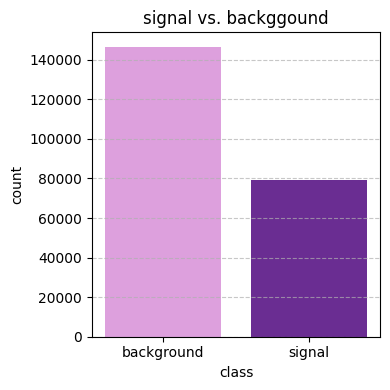


Percentages:
Percentage of Background : 64.89%
Percentage of Signal : 35.11%


In [17]:
x=df_clean[features] #defining predictors
y=df_clean["isSignal"] #defining outcome

signal_count=y.sum() #calculationg the total signals in the data set
background_count=len(y)-signal_count #calculating the number of background events

print("signal count:",signal_count)
print("background count:",background_count)

counts=y.value_counts().sort_index()
plt.figure(figsize=(4,4))
plt.bar(["background","signal"],counts,color=["plum","#6A2D92"]) #printing comparison plot between signal and background events.
plt.xlabel("class")
plt.ylabel("count")
plt.title("signal vs. backggound")
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

background_count=len(background_df)
signal_count=len(signal_df)
tot=background_count+signal_count

backg=(background_count/tot)*100 #calculating the % of background events.
sig=(signal_count/tot)*100 #calculating the % of signal events.
print("\nPercentages:")
print("Percentage of Background : {:.2f}%".format(backg))
print("Percentage of Signal : {:.2f}%".format(sig))

very imbalanced, background need to be resampled to match signal.


In [18]:
#background re-sampling
backg_downsampled=resample(background_df,replace=False,n_samples=len(signal_df),random_state=45)
df_balanced=pd.concat([signal_df,backg_downsampled])
df_balanced=df_balanced.sample(frac=1,random_state=30).reset_index(drop=True)

X=df_balanced[features] #new balanced predictors.
Y=df_balanced["isSignal"] #new balanced outcome.

 (c) Consider if a standardisation of the predictor distributions is needed.

In [19]:
s1=StandardScaler()
X_1=s1.fit_transform(X)

 (d) Split the datasets in training and testing samples.

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X_1,Y,test_size=0.3,random_state=45,stratify=Y) ##stratifying the dsata set, to mantain the same test size for both predictors and outcome throughout the whole model, to avoid class imbalance.

 (e) Build the classification algorithms we discussed in lectures (Naive Bayes,
 Linear Discrimination, Logistic Regression).

Naive Bayes

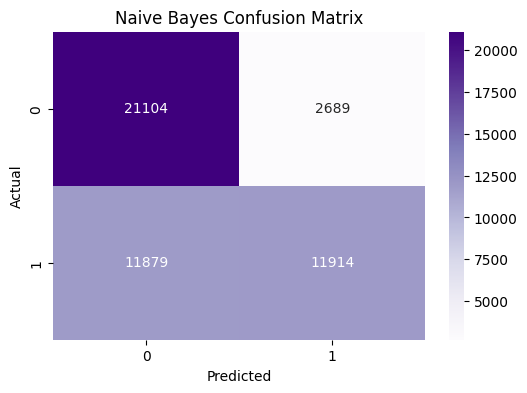


Classification Report
              precision    recall  f1-score   support

         0.0       0.64      0.89      0.74     23793
         1.0       0.82      0.50      0.62     23793

    accuracy                           0.69     47586
   macro avg       0.73      0.69      0.68     47586
weighted avg       0.73      0.69      0.68     47586

AUC score for Naive Bayes: 0.82


In [21]:
gnb=GaussianNB() #performed naive bayes regression.
gnb.fit(X_train, Y_train)
y_pred_g=gnb.predict(X_test)
y_prob_g=gnb.predict_proba(X_test)[:, 1]

cm_g=confusion_matrix(Y_test,y_pred_g) #computed confusion matrix.
plt.figure(figsize=(6, 4))
sns.heatmap(cm_g,annot=True,fmt='d',cmap='Purples',xticklabels=[0,1],yticklabels=[0,1]) #created a heatmap for the confusion matrix so it appears clearer.
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report") #computed classification report.
print(classification_report(Y_test,y_pred_g))

auc_g=roc_auc_score(Y_test,y_prob_g) #computed naive bayes AUC score.
print(f"AUC score for Naive Bayes: {auc_g:.2f}")

Linear Discriminant Analysis

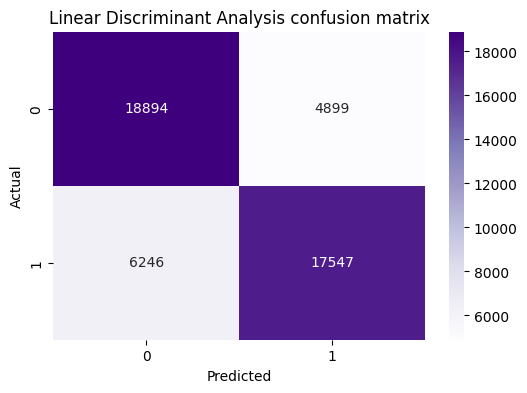


Classification report
              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77     23793
         1.0       0.78      0.74      0.76     23793

    accuracy                           0.77     47586
   macro avg       0.77      0.77      0.77     47586
weighted avg       0.77      0.77      0.77     47586

AUC score for Linear Discriminant Analysis: 0.84


In [22]:
lda = LinearDiscriminantAnalysis() #performed linear discriminant analysis regression.
lda.fit(X_train, Y_train)
y_pred_lda=lda.predict(X_test)
y_prob_lda=lda.predict_proba(X_test)[:, 1]

cm_lda=confusion_matrix(Y_test,y_pred_lda) #computed confusion matrix.
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lda,annot=True,fmt='d',cmap='Purples',xticklabels=[0,1],yticklabels=[0,1])
plt.title("Linear Discriminant Analysis confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification report") #computed classification report.
print(classification_report(Y_test,y_pred_lda))

auc_lda=roc_auc_score(Y_test,y_prob_lda) #computed lda AUC score.
print(f"AUC score for Linear Discriminant Analysis: {auc_lda:.2f}")


Logistic Regression

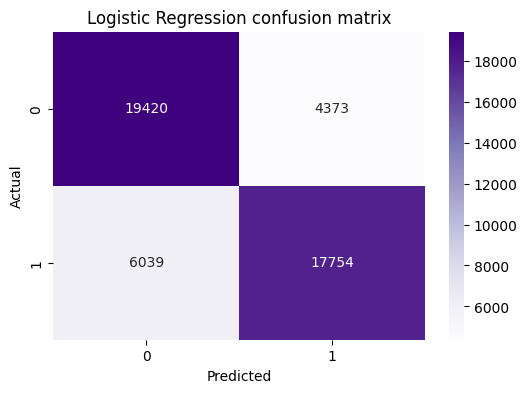


Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79     23793
         1.0       0.80      0.75      0.77     23793

    accuracy                           0.78     47586
   macro avg       0.78      0.78      0.78     47586
weighted avg       0.78      0.78      0.78     47586

AUC Score for Logistic Regression: 0.86


In [23]:
lr=LogisticRegression(max_iter=10000) #performed logistic regression regression, by setting max_iter to 10000 it ensures convergence since it is large data set.
lr.fit(X_train,Y_train)
y_pred_lr=lr.predict(X_test)
y_prob_lr=lr.predict_proba(X_test)[:, 1]

cm_lr=confusion_matrix(Y_test,y_pred_lr) #computed confusion matrix.
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr,annot=True,fmt='d',cmap='Purples',xticklabels=[0,1],yticklabels=[0,1])
plt.title("Logistic Regression confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\nClassification Report") #computed classification report.
print(classification_report(Y_test,y_pred_lr))

auc_lr=roc_auc_score(Y_test,y_prob_lr) #computedlogistic regression AUC score.
print(f"AUC Score for Logistic Regression: {auc_lr:.2f}")

 (f) For each case, plot the classification outcomes/probabilities overlapping
 the two distributions from the two types of events.

  Naive Bayes

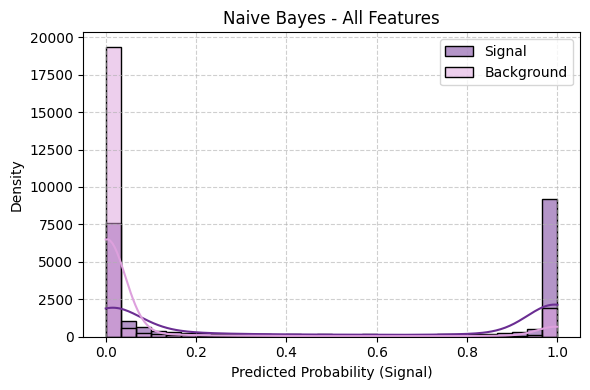

In [24]:
plt.figure(figsize=(6,4)) #plotting distribuition plot between signal and background events.
sns.histplot(y_prob_g[Y_test==1],label="Signal",color="#6A2D92",bins=30,kde=True)
sns.histplot(y_prob_g[Y_test==0],label="Background",color="plum",bins=30,kde=True)

plt.xlabel("Predicted Probability (Signal)")
plt.ylabel("Density")
plt.title("Naive Bayes - All Features")
plt.legend()
plt.grid(True,linestyle="--",alpha=0.6)
plt.tight_layout()
plt.show()

Linear Discriminant Analysis

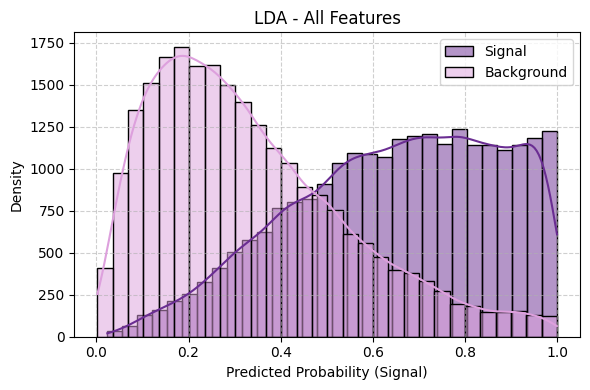

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(y_prob_lda[Y_test == 1],label="Signal",color="#6A2D92",bins=30,kde=True)
sns.histplot(y_prob_lda[Y_test == 0],label="Background",color="plum",bins=30,kde=True)

plt.xlabel("Predicted Probability (Signal)")
plt.ylabel("Density")
plt.title("LDA - All Features")
plt.legend()
plt.grid(True, linestyle="--",alpha=0.6)
plt.tight_layout()
plt.show()

Logistic Regression

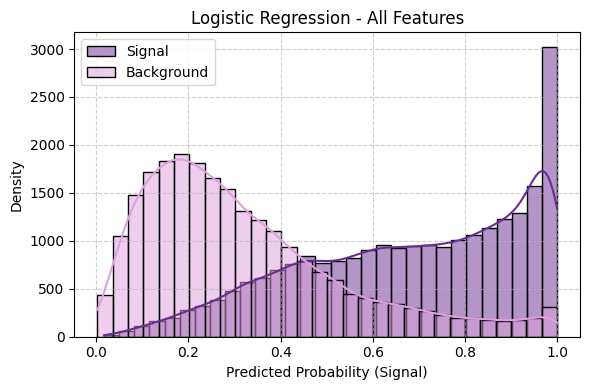

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(y_prob_lr[Y_test == 1],label="Signal",color="#6A2D92",bins=30,kde=True)
sns.histplot(y_prob_lr[Y_test == 0],label="Background",color="plum",bins=30,kde=True)

plt.xlabel("Predicted Probability (Signal)")
plt.ylabel("Density")
plt.title("Logistic Regression - All Features")
plt.legend()
plt.grid(True, linestyle="--",alpha=0.6)
plt.tight_layout()
plt.show()

 (g) Consider if restricting the input variables to a subset can improve the per
formance for each of the classification algorithms. Explain your reasoning
 for choosing the variables in the subset (if applicable).


Restricting the number of numerical variables will only be beneficial, if 90% of the variance is used. If more features are dropped then the classification performance will drop statistically. This is because for this data set, it was already established though PCA that most principal components hold most of the variance and that each component is crucial in characterizing jets and their properties. Also, by reducing features, it was showcased though the classfication models, that the accuracy in discriminitive power drops, therefore you need to have all features (especially in data sets such as these in particle physics) in order to be able to track very rare events such as signal detection.

ii. Case 2

In [27]:
s2=StandardScaler()
X_scaled=s2.fit_transform(X)
pca=PCA(n_components=0.85)
X_2=pca.fit_transform(X_scaled)

 (d) Split the datasets in training and testing samples.

In [28]:
X_train_pca,X_test_pca,Y_train_pca,Y_test_pca=train_test_split(X_2,Y,test_size=0.3,random_state=30,stratify=Y)

 (e) Build the classification algorithms we discussed in lectures (Naive Bayes,
 Linear Discrimination, Logistic Regression).

Naive Bayes

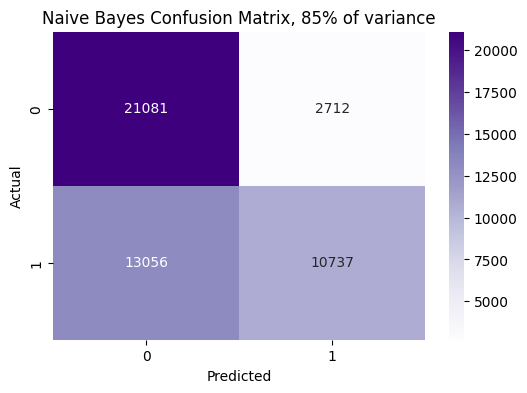


Classification Report
              precision    recall  f1-score   support

         0.0       0.62      0.89      0.73     23793
         1.0       0.80      0.45      0.58     23793

    accuracy                           0.67     47586
   macro avg       0.71      0.67      0.65     47586
weighted avg       0.71      0.67      0.65     47586

AUC score for Naive Bayes: 0.82


In [29]:
gnb=GaussianNB() #performed naive bayes regression.
gnb.fit(X_train_pca, Y_train_pca)
pca_gnb_pred=gnb.predict(X_test_pca)
pca_gnb_prob=gnb.predict_proba(X_test_pca)[:, 1]

cm_g_pca=confusion_matrix(Y_test_pca,pca_gnb_pred) #computed confusion matrix.
plt.figure(figsize=(6, 4))
sns.heatmap(cm_g_pca,annot=True,fmt='d',cmap='Purples',xticklabels=[0,1],yticklabels=[0,1]) #created a heatmap for the confusion matrix so it appears clearer.
plt.title("Naive Bayes Confusion Matrix, 85% of variance")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report") #computed classification report.
print(classification_report(Y_test_pca,pca_gnb_pred))

auc_g_pca=roc_auc_score(Y_test_pca,pca_gnb_prob) #computed naive bayes AUC score.
print(f"AUC score for Naive Bayes: {auc_g_pca:.2f}")

LDA

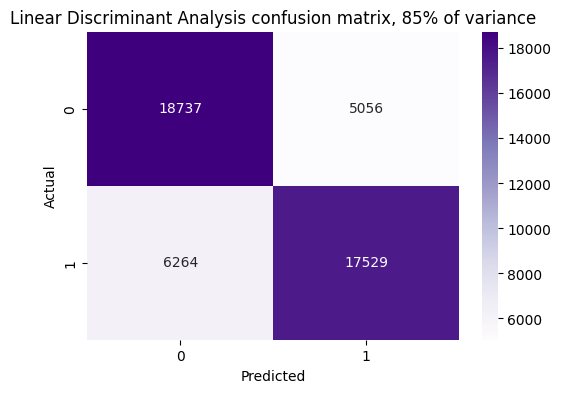


Classification report
              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77     23793
         1.0       0.78      0.74      0.76     23793

    accuracy                           0.76     47586
   macro avg       0.76      0.76      0.76     47586
weighted avg       0.76      0.76      0.76     47586

AUC score for Linear Discriminant Analysis: 0.84


In [30]:
lda = LinearDiscriminantAnalysis() #performed linear discriminant analysis regression.
lda.fit(X_train_pca, Y_train_pca)
pca_lda_pred=lda.predict(X_test_pca)
pca_lda_prob=lda.predict_proba(X_test_pca)[:, 1]

cm_lda=confusion_matrix(Y_test_pca,pca_lda_pred) #computed confusion matrix.
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lda,annot=True,fmt='d',cmap='Purples',xticklabels=[0,1],yticklabels=[0,1])
plt.title("Linear Discriminant Analysis confusion matrix, 85% of variance")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification report") #computed classification report.
print(classification_report(Y_test_pca,pca_lda_pred))

auc_lda=roc_auc_score(Y_test_pca,pca_lda_prob) #computed lda AUC score.
print(f"AUC score for Linear Discriminant Analysis: {auc_lda:.2f}")

Logistic Regression

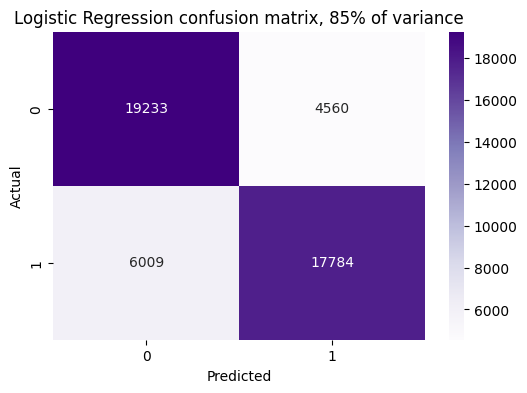


Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.78     23793
         1.0       0.80      0.75      0.77     23793

    accuracy                           0.78     47586
   macro avg       0.78      0.78      0.78     47586
weighted avg       0.78      0.78      0.78     47586

AUC Score for Logistic Regression: 0.85


In [31]:
lr=LogisticRegression(max_iter=10000) #performed logistic regression regression, by setting max_iter to 10000 it ensures convergence since it is large data set.
lr.fit(X_train_pca,Y_train_pca)
pca_lr_pred=lr.predict(X_test_pca)
pca_lr_prob=lr.predict_proba(X_test_pca)[:, 1]

cm_lr=confusion_matrix(Y_test_pca,pca_lr_pred) #computed confusion matrix.
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr,annot=True,fmt='d',cmap='Purples',xticklabels=[0,1],yticklabels=[0,1])
plt.title("Logistic Regression confusion matrix, 85% of variance")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\nClassification Report") #computed classification report.
print(classification_report(Y_test_pca,pca_lr_pred))

auc_lr=roc_auc_score(Y_test_pca,pca_lr_prob) #computedlogistic regression AUC score.
print(f"AUC Score for Logistic Regression: {auc_lr:.2f}")

 (f) For each case, plot the classification outcomes/probabilities overlapping
 the two distributions from the two types of events.

Naive Bayes

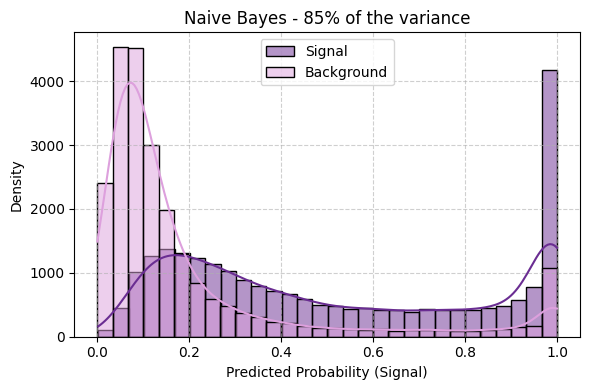

In [32]:
plt.figure(figsize=(6,4))
sns.histplot(pca_gnb_prob[Y_test_pca == 1],label="Signal", color="#6A2D92",bins=30,kde=True)
sns.histplot(pca_gnb_prob[Y_test_pca == 0],label="Background", color="plum",bins=30,kde=True)

plt.xlabel("Predicted Probability (Signal)")
plt.ylabel("Density")
plt.title("Naive Bayes - 85% of the variance")
plt.legend()
plt.grid(True, linestyle="--",alpha=0.6)
plt.tight_layout()
plt.show()

Linear Discriminant Analysis

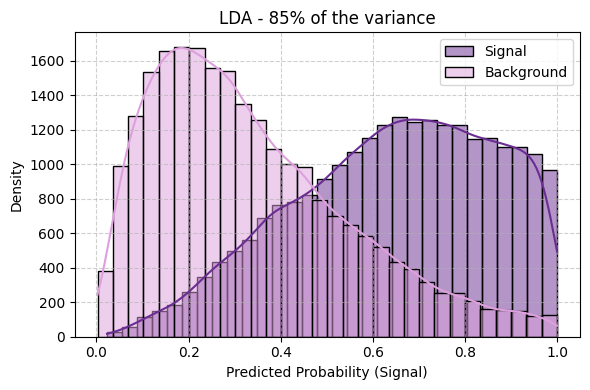

In [33]:
plt.figure(figsize=(6,4))
sns.histplot(pca_lda_prob[Y_test_pca == 1],label="Signal", color="#6A2D92",bins=30,kde=True)
sns.histplot(pca_lda_prob[Y_test_pca == 0],label="Background", color="plum",bins=30,kde=True)

plt.xlabel("Predicted Probability (Signal)")
plt.ylabel("Density")
plt.title("LDA - 85% of the variance")
plt.legend()
plt.grid(True, linestyle="--",alpha=0.6)
plt.tight_layout()
plt.show()

Logistic Regression

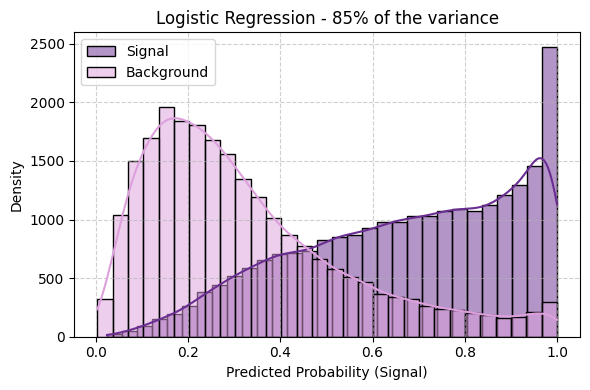

In [34]:
plt.figure(figsize=(6,4))
sns.histplot(pca_lr_prob[Y_test_pca == 1],label="Signal", color="#6A2D92",bins=30,kde=True)
sns.histplot(pca_lr_prob[Y_test_pca == 0],label="Background", color="plum",bins=30,kde=True)

plt.xlabel("Predicted Probability (Signal)")
plt.ylabel("Density")
plt.title("Logistic Regression - 85% of the variance")
plt.legend()
plt.grid(True, linestyle="--",alpha=0.6)
plt.tight_layout()
plt.show()

 (h) Considering the best performing classification algorithm, perform a thresh
old optimisation using the Punzi significance.

All variables Classifiers - Optimal threshold: 0.69 with Punzi SP: 0.0117
PCA Classifier - Optimal threshold: 0.63 with Punzi SP: 0.0114


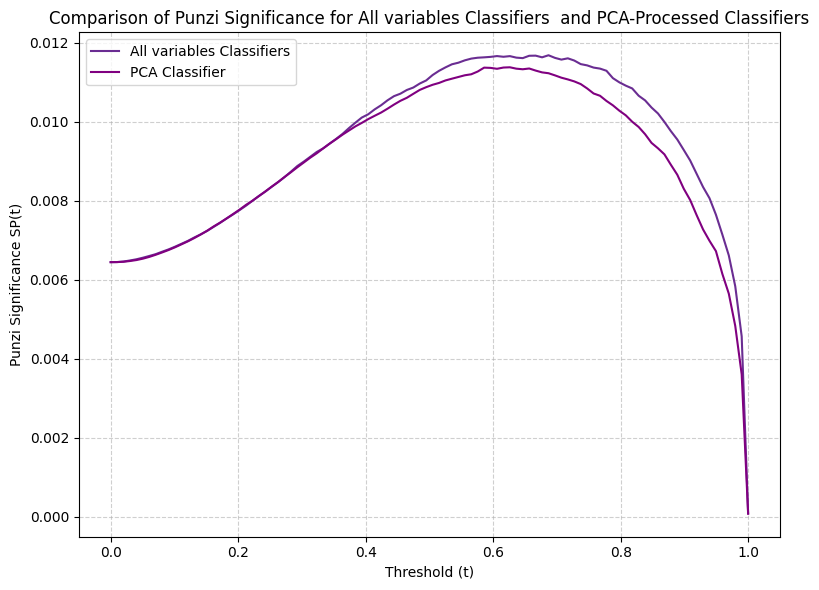

In [35]:
def Punzi_significance(Y_true,Y_scores,label=None,color=None): #computing a function to calculate punzi significance.
  punzis=[] #assigning the punzi values to an empty list to plot then after.
  threshold= np.linspace(0,1,100)

  for t in threshold: #computing a loop, to calculate the SP value
    preds=Y_scores>= t

    signal_total=np.sum(Y_true==1)
    signal_passed=np.sum((Y_true==1) & preds)
    if signal_total>0:
      epsilon=signal_passed/signal_total #computing formula for SP
    else:
      epsilon=0

    background_passed=np.sum((Y_true==0) & preds)
    S_p=epsilon/(1+np.sqrt(background_passed))
    punzis.append(S_p) #all of the SP values are appended to the list.

  plt.plot(threshold,punzis,label=label,color=color)

  optimized_t=threshold[np.argmax(punzis)] #optimal threshold is plotted
  print(f"{label} - Optimal threshold: {optimized_t:.2f} with Punzi SP: {max(punzis):.4f}")

  return optimized_t, punzis

plt.figure(figsize=(8,6))


optimized_t_lr,punzis_lr=Punzi_significance(Y_test, y_prob_lr, label="All variables Classifiers",color="#6A2D92")
optimized_t_pca,punzis_pca=Punzi_significance(Y_test_pca, pca_lr_prob, label="PCA Classifier",color="purple")

#plotting graph of SP values as a fucntion of t.
plt.xlabel("Threshold (t)")
plt.ylabel("Punzi Significance SP(t)")
plt.title("Comparison of Punzi Significance for All variables Classifiers  and PCA-Processed Classifiers")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()

1. Looking at your exploration of the data, the PCA and the classification al
gorithms, summarise your results on this dataset.

Exploration- The initial data exploration used histograms, bar plots, and heatmaps to assess feature distributions. This revealed that most features were moderately informative and exhibited low pairwise correlations, indicating limited multicollinearity. However, certain features such as track pseudorapidity and vertex alignment showed distinct clustering patterns, which hinted at strong discriminative potential between signal and background jets.

PCA- Principal Component Analysis (PCA) was applied separately to Hbb and QCD samples. The first five components captured about 65% of the variance, and analysis of the component weights showed that a wide range of features contributed meaningfully, suggesting the dataset’s structure is high-dimensional, with no single dominant feature.

Classification- Using both the full feature set and PCA-reduced datasets (85% variance), three supervised learning models were tested: Naive Bayes, Linear Discriminant Analysis (LDA), and Logistic Regression (LR). LR outperformed the others across all metrics (accuracy, precision, recall, F1-score) and showed the lowest prediction overlap between classes in probability distribution plots. While LDA performed comparably to LR, its accuracy dropped slightly after PCA. Naive Bayes was most impacted, suffering from overfitting and reduced performance due to its assumptions and the dataset’s complexity.


2. Refer to at least five external sources, which you should identify through a
 short literature review, for explaining the analysis and justifying your con
clusions.

1. "Evidence for the Higgs Boson Decay to a Bottom Quark–Antiquark Pair"
Authors: The CMS Collaboration (2018)
Journal: Physics Letters B
Summary:
This paper presents strong experimental evidence for the decay of the Higgs boson into a pair of bottom quarks (H→bb), which is predicted by the Standard Model. Using data from the CMS detector at CERN, the team observes an excess of events with a significance of 3.3σ, which increases to 3.8σ when combined with earlier data. Advanced statistical tools, such as boosted decision trees, were used to isolate the signal from significant background noise. The results confirm the Higgs coupling to fermions and validate key aspects of the Standard Model.

---

2. "Overfitting in Prediction Models – Is it a Problem Only in High Dimensions?"
Authors: Jyothi Subramanian & Richard Simon (2013)
Journal: Contemporary Clinical Trials
Summary:
This study investigates overfitting in predictive models developed from low-dimensional data, countering the belief that overfitting is mainly a high-dimensional issue. Through simulations, the authors show that even models with a small number of predictors can overfit, especially when the signal is weak. They recommend using independent test sets or full cross-validation to assess model performance reliably. The paper highlights that overfitting must be addressed regardless of the data's dimensionality, particularly in clinical applications.


---
3. The CERN website (https://home.cern) the site provides tools and documentation essential for high-energy physics investigations, including the CERN Document Server and access to open data initiatives. It provides a lot of information of the main experiments and the study of the Standard model itself.
---
4. "Punzi-loss: A Non-differentiable Metric Approximation for Sensitivity Optimisation in the Search for New Particles"
This paper introduces the Punzi-loss function, a differentiable approximation of the Punzi figure-of-merit (FOM) widely used in particle physics for optimizing event selection sensitivity in searches for new particles. The authors identify the challenge of using standard loss functions (like binary cross-entropy) when the goal is to maximize detection sensitivity rather than just classification accuracy. To address this, they construct a loss based on a differentiable version of the Punzi FOM, allowing effective training of neural networks (called Punzi-nets) tailored for signal-background discrimination in particle searches.

---

5. "The Higgs Boson – Its Implications and Prospects for Future Discoveries"
This comprehensive review discusses the discovery, properties, and theoretical significance of the Higgs boson, discovered at the LHC in 2012 with a mass of 125 GeV. The authors examine key experimental achievements such as measurements of couplings to vector bosons and fermions (including recent confirmation of Higgs-to-muon decays), the role of the Higgs in electroweak symmetry breaking, and constraints on its self-coupling.


